Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import sys
from pathlib import Path

parent_dir = Path.cwd().parent.parent

if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))
from shared.metrics import print_evaluation_metrics
from shared.helpers import store_model
from shared.helpers import store_predictions_and_create_graph

Load dataset and prepare df

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date"
target_column = "Close"
df = pd.read_csv(file_path, parse_dates=True)
df = df[[date_column, target_column]]

df.set_index(date_column, inplace=True)
dates = df.index.values

Train test split

In [3]:
data_length = len(df)
train_split = 0.9
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

Parameter tuning for order

In [4]:
stepwise_fit = auto_arima(df, trace=True, suppress_warnings=True, max_p=10, max_q=10, test='adf', seasonal=False, m=12)
best_order = stepwise_fit.order

/home/samuell/.local/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=54921.682, Time=4.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=54939.395, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=54938.561, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=54938.616, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=54938.255, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=54941.153, Time=1.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=54941.494, Time=1.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=54923.607, Time=5.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=54923.588, Time=4.88 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=54940.492, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=54941.017, Time=1.46 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=54941.335, Time=1.40 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=54925.704, Time=5.38 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=54940.506, Time=0.61 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time:

Create Model

In [5]:
model = ARIMA(train[target_column], order=(10,1,10))
model = model.fit()
model.summary()

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3056
Model:               ARIMA(10, 1, 10)   Log Likelihood              -24682.045
Date:                Mon, 01 Apr 2024   AIC                          49406.091
Time:                        09:50:45   BIC                          49532.606
Sample:                    10-17-2014   HQIC                         49451.556
                         - 02-27-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2613      0.397     -0.659      0.510      -1.039       0.516
ar.L2          0.1369      0.087      1.576      0.115      -0.033       0.307
ar.L3         -0.3179      0.118     -2.691      0.007      -0.549      -0.086
ar.L4          0.5343      0.194      2.753      0.006       0.154       0.915
ar.L5          0.2996      0.274      1.093      0.274      -0.238       0.837
ar.L6         -0.2292      0.105     -2.184      0.029      -0.435      -0.023
ar.L7          0.2574      0.179      1.437      0.151      -0.094       0.608
ar.L8         -0.3146      0.173     -1.815      0.070      -0.654       0.025
ar.L9         -0.4644      0.176     -2.635      0.008      -0.810      -0.119
ar.L10        -0.2534      0.170     -1.489      0.136      -0.587       0.080
ma.L1          0.2455      0.397      0.618      0.537      -0.533       1.024
ma.L2         -0.1426      0.086     -1.663      0.096      -0.311       0.025
ma.L3          0.3460      0.117      2.957      0.003       0.117       0.575
ma.L4         -0.5114      0.205     -2.496      0.013      -0.913      -0.110
ma.L5         -0.2699      0.267     -1.009      0.313      -0.794       0.254
ma.L6          0.2669      0.097      2.756      0.006       0.077       0.457
ma.L7         -0.3053      0.186     -1.641      0.101      -0.670       0.059
ma.L8          0.2676      0.195      1.370      0.171      -0.115       0.651
ma.L9          0.5451      0.165      3.298      0.001       0.221       0.869
ma.L10         0.2606      0.204      1.277      0.201      -0.139       0.660
sigma2      6.209e+05   6073.891    102.217      0.000    6.09e+05    6.33e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             28908.11
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             986.66   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Predict

In [5]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ="levels")

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Plot the result

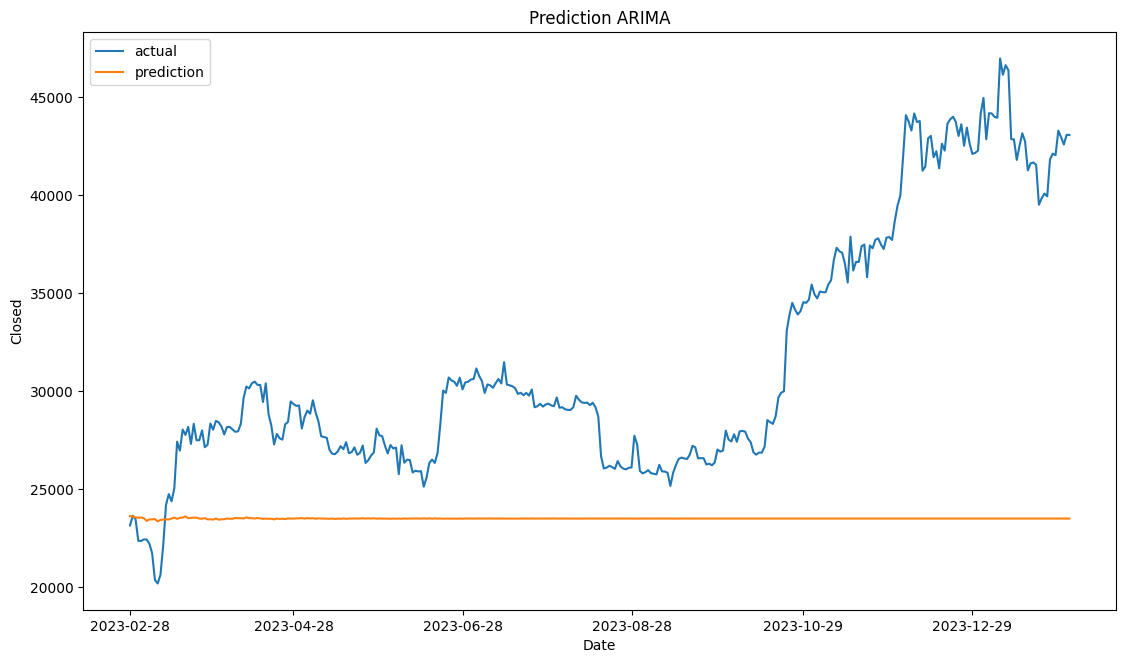

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], list(pred), label="prediction")
ax.set_title("Prediction ARIMA")
ax.set_ylabel("Closed")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

Metrics

In [7]:
non_zero = []
import sys
 
for i in pred:
    if i == 0:
        non_zero.append(i+sys.float_info.min)
    else:
        non_zero.append(i)
print_evaluation_metrics(non_zero, test[target_column], train[target_column])

Evaluation Metrics:
MSE: 103420406.08
RMSE: 10169.58
MAE: 8059.02
MAPE: 23.04
SMAPE: 27.31
MASE: 22.37


Store model

In [8]:
store_model(model, "arima")

Store results and depict them on graph

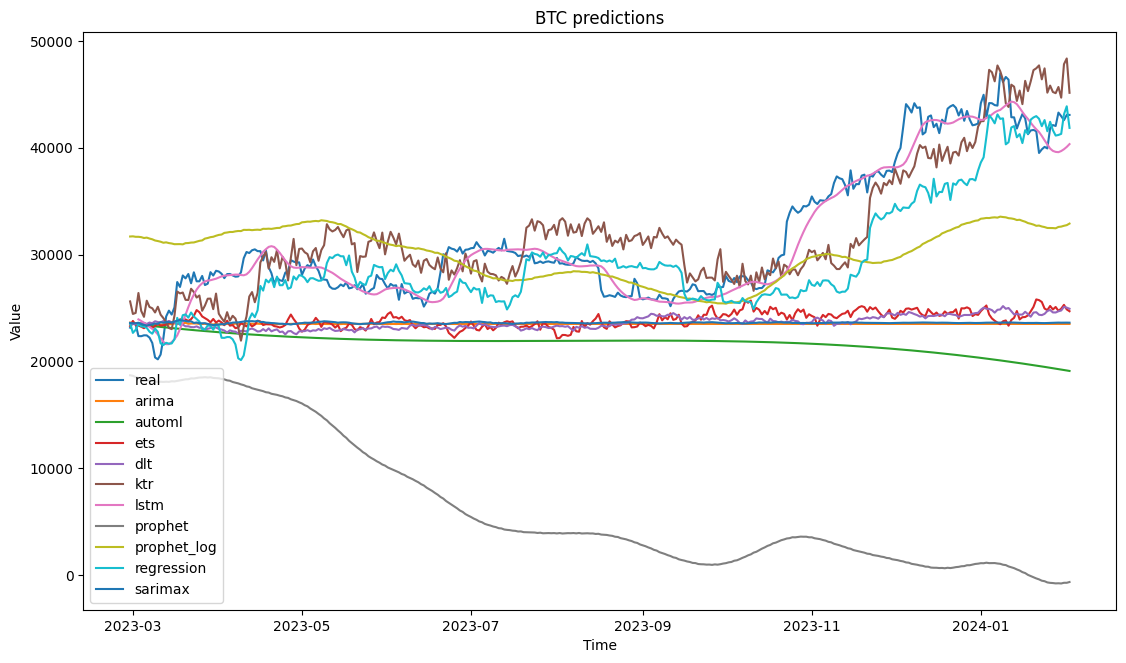

In [10]:
store_predictions_and_create_graph("arima", dates[int(data_length*train_split):], non_zero, test[target_column], "BTC")